In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

import re

In [2]:
df=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/employee.tsv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      9 non-null      object 
 1   dob         8 non-null      object 
 2   occupation  10 non-null     object 
 3   work_exp    10 non-null     float64
 4   salary      8 non-null      float64
 5   own_house   10 non-null     bool   
 6   children    10 non-null     int64  
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 618.0+ bytes


In [3]:
df

,gender,dob,occupation,work_exp,salary,own_house,children
0,M,31-Jul-89,nurse,2.2,223700.0,True,1
1,NaN,30-Oct-92,dentist,6.7,121100.0,True,1
2,F,NaN,accountant,9.0,NaN,False,2
3,F,17-Sep-87,engineer,1.7,79900.0,False,0
4,M,24-Jan-93,teacher,3.6,32800.0,False,2
5,F,NaN,developer,1.8,NaN,True,1
6,F,26-Sep-94,nurse,5.6,272500.0,False,1
7,M,7-May-91,lawyer,4.1,41600.0,False,0
8,M,4-Dec-94,teacher,3.3,141300.0,True,0
9,M,10-Jul-87,police,6.5,68000.0,True,1


In [4]:
df=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/employee.tsv', index_col=['dob'], parse_dates=True)
df.sum()

C:\Users\Acer\AppData\Local\Temp\ipykernel_10352\3524718862.py:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.sum()


occupation    nursedentistaccountantengineerteacherdeveloper...
work_exp                                                   44.5
salary                                                 980900.0
own_house                                                     5
children                                                      9
dtype: object

In [5]:
df=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/employee.tsv')
# df.dob = pd.to_datetime(df.dob, format='')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      9 non-null      object 
 1   dob         8 non-null      object 
 2   occupation  10 non-null     object 
 3   work_exp    10 non-null     float64
 4   salary      8 non-null      float64
 5   own_house   10 non-null     bool   
 6   children    10 non-null     int64  
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 618.0+ bytes


In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mpg.csv')
df.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [8]:
df['am'] = df.trans.str[:4]
df


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,am
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manu
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manu
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,auto
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,manu
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,auto
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,manu


In [9]:
df.sample(frac=0.01)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,am
119,hyundai,tiburon,2.7,2008,6,auto(l4),f,17,24,r,subcompact,auto
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,manu


In [10]:
df.nlargest(5, columns='cty')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,am
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,manu
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,manu
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,auto
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact,manu
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,manu


In [11]:
df.sort_values(by='hwy', ascending=False)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,am
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,manu
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,manu
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,auto
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,manu
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,auto
...,...,...,...,...,...,...,...,...,...,...,...,...
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,auto
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,auto
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,auto
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,manu


<AxesSubplot: >

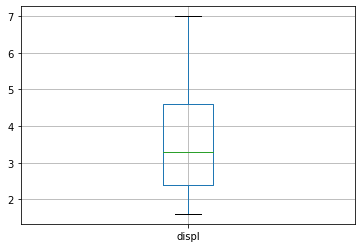

In [12]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df[['displ']].boxplot()

In [13]:
df[df.columns[df.columns.str.contains('a')]]

,manufacturer,year,trans,class
0,audi,1999,auto(l5),compact
1,audi,1999,manual(m5),compact
2,audi,2008,manual(m6),compact
3,audi,2008,auto(av),compact
4,audi,1999,auto(l5),compact
...,...,...,...,...
229,volkswagen,2008,auto(s6),midsize
230,volkswagen,2008,manual(m6),midsize
231,volkswagen,1999,auto(l5),midsize
232,volkswagen,1999,manual(m5),midsize


In [14]:
df.select_dtypes('number')

,displ,year,cyl,cty,hwy
0,1.8,1999,4,18,29
1,1.8,1999,4,21,29
2,2.0,2008,4,20,31
3,2.0,2008,4,21,30
4,2.8,1999,6,16,26
...,...,...,...,...,...
229,2.0,2008,4,19,28
230,2.0,2008,4,21,29
231,2.8,1999,6,16,26
232,2.8,1999,6,18,26


In [15]:
stocks = ['bbl', 'ktb', 'scb']
dfs = []
location = 'https://github.com/prasertcbs/tutorial/raw/master/eod/'
dfs = [pd.read_csv(f'{location}{s}.csv', parse_dates=True, index_col="Date") for s in stocks ]

In [16]:
pd.concat(dfs, keys=[1,2,3], names=['!', '@@'])

Open        High         Low       Close   Adj Close  \
! @@                                                                       
1 2017-02-01  174.500000  175.500000  173.500000  175.500000  169.355362   
  2017-02-02  175.000000  177.000000  174.500000  175.500000  169.355362   
  2017-02-03  175.000000  178.500000  175.000000  178.500000  172.250336   
  2017-02-06  178.500000  181.500000  178.500000  180.500000  174.180313   
  2017-02-07  180.500000  181.000000  179.000000  180.000000  173.697815   
  2017-02-08  180.000000  180.000000  178.500000  179.000000  172.732819   
  2017-02-09  179.500000  182.500000  179.500000  181.000000  174.662796   
  2017-02-10  182.000000  182.500000  181.000000  182.500000  176.110275   
  2017-02-13  182.500000  182.500000  182.500000  182.500000  176.110275   
  2017-02-14  182.000000  182.500000  179.000000  179.000000  172.732819   
2 2017-02-01   19.000000   19.200001   18.900000   19.200001   18.366062   
  2017-02-02   19.200001   19.200001   18.900000   19.000000   18.174747   
  2017-02-03   19.000000   19.100000   18.900000   19.100000   18.270405   
  2017-02-06   19.200001   19.299999   18.900000   19.000000   18.174747   
  2017-02-07   18.900000   19.100000   18.799999   19.000000   18.174747   
  2017-02-08   19.000000   19.200001   18.900000   19.000000   18.174747   
  2017-02-09   19.100000   19.700001   19.100000   19.500000   18.653030   
  2017-02-10   19.600000   19.600000   19.400000   19.400000   18.557373   
  2017-02-13   19.400000   19.400000   19.400000   19.400000   18.557373   
  2017-02-14   19.500000   19.700001   19.200001   19.400000   18.557373   
3 2017-02-01  150.500000  153.000000  150.500000  152.000000  146.727814   
  2017-02-02  152.000000  153.000000  151.000000  151.000000  145.762512   
  2017-02-03  151.000000  153.500000  151.000000  153.000000  147.693130   
  2017-02-06  154.000000  155.000000  153.500000  154.500000  149.141098   
  2017-02-07  154.500000  155.000000  153.500000  154.000000  148.658447   
  2017-02-08  153.500000  154.500000  153.000000  154.000000  148.658447   
  2017-02-09  154.500000  156.000000  153.500000  154.000000  148.658447   
  2017-02-10  154.500000  155.000000  154.000000  154.000000  148.658447   
  2017-02-13  154.000000  154.000000  154.000000  154.000000  148.658447   
  2017-02-14  155.000000  156.000000  153.000000  154.000000  148.658447   

                   Volume  
! @@                       
1 2017-02-01    5953500.0  
  2017-02-02    5250500.0  
  2017-02-03    5470600.0  
  2017-02-06    8150800.0  
  2017-02-07    3648600.0  
  2017-02-08    2574200.0  
  2017-02-09    7290700.0  
  2017-02-10    3589100.0  
  2017-02-13          0.0  
  2017-02-14    2841700.0  
2 2017-02-01   21752200.0  
  2017-02-02   40206000.0  
  2017-02-03   48912400.0  
  2017-02-06   77639200.0  
  2017-02-07   49866700.0  
  2017-02-08   57530300.0  
  2017-02-09  142179400.0  
  2017-02-10   55991300.0  
  2017-02-13          0.0  
  2017-02-14   69731100.0  
3 2017-02-01    6969200.0  
  2017-02-02    6529100.0  
  2017-02-03    6597700.0  
  2017-02-06    9901200.0  
  2017-02-07    3802600.0  
  2017-02-08    5747300.0  
  2017-02-09    6157400.0  
  2017-02-10    9620500.0  
  2017-02-13          0.0  
  2017-02-14    9754000.0

In [17]:
url='https://github.com/prasertcbs/basic-dataset/blob/master/PisaScore2015.xlsx?raw=true'
math = pd.read_excel(url, sheet_name=None)
math

{'math':     Rank             Country  Maths
 0      1           Singapore    564
 1      2           Hong Kong    548
 2      3               Macau    544
 3      4              Taiwan    542
 4      5               Japan    532
 ..   ...                 ...    ...
 65    68           Macedonia    371
 66    69             Tunisia    367
 67    70              Kosovo    362
 68    71             Algeria    360
 69    72  Dominican Republic    328
 
 [70 rows x 3 columns],
 'sci':     Rank             Country  Science
 0      1           Singapore      556
 1      2               Japan      538
 2      3             Estonia      534
 3      4              Taiwan      532
 4      5             Finland      531
 ..   ...                 ...      ...
 65    68             Tunisia      386
 66    69           Macedonia      384
 67    70              Kosovo      378
 68    71             Algeria      376
 69    72  Dominican Republic      332
 
 [70 rows x 3 columns],
 'reading':     Rank 

In [18]:
math.keys()

dict_keys(['math', 'sci', 'reading'])

In [19]:
pd.merge(math['math'], math['sci'], on=['Country'], suffixes=['XXXXX', 'Y'], how='outer', indicator=True)

,RankXXXXX,Country,Maths,RankY,Science,_merge
0,1,Singapore,564,1,556,both
1,2,Hong Kong,548,9,523,both
2,3,Macau,544,6,529,both
3,4,Taiwan,542,4,532,both
4,5,Japan,532,2,538,both
...,...,...,...,...,...,...
65,68,Macedonia,371,69,384,both
66,69,Tunisia,367,68,386,both
67,70,Kosovo,362,70,378,both
68,71,Algeria,360,71,376,both


In [20]:
df = pd.read_table('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/gapminder.tsv').set_index(['country', 'year'])
df

continent  lifeExp       pop   gdpPercap
country     year                                         
Afghanistan 1952      Asia   28.801   8425333  779.445314
            1957      Asia   30.332   9240934  820.853030
            1962      Asia   31.997  10267083  853.100710
            1967      Asia   34.020  11537966  836.197138
            1972      Asia   36.088  13079460  739.981106
...                    ...      ...       ...         ...
Zimbabwe    1987    Africa   62.351   9216418  706.157306
            1992    Africa   60.377  10704340  693.420786
            1997    Africa   46.809  11404948  792.449960
            2002    Africa   39.989  11926563  672.038623
            2007    Africa   43.487  12311143  469.709298

[1704 rows x 4 columns]

In [21]:
df.loc[pd.IndexSlice[:, 1962], :]

,,continent,lifeExp,pop,gdpPercap
country,year,,,,
Afghanistan,1962,Asia,31.997,10267083,853.100710
Albania,1962,Europe,64.820,1728137,2312.888958
Algeria,1962,Africa,48.303,11000948,2550.816880
Angola,1962,Africa,34.000,4826015,4269.276742
Argentina,1962,Americas,65.142,21283783,7133.166023
...,...,...,...,...,...
Vietnam,1962,Asia,45.363,33796140,772.049160
West Bank and Gaza,1962,Asia,48.127,1133134,2198.956312
"Yemen, Rep.",1962,Asia,35.180,6120081,825.623201


In [22]:
df.index.get_level_values(0)

Index(['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan',
       'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan',
       'Afghanistan', 'Afghanistan',
       ...
       'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe',
       'Zimbabwe', 'Zimbabwe', 'Zimbabwe', 'Zimbabwe'],
      dtype='object', name='country', length=1704)

In [23]:
df[df.index.get_level_values(0) == 'Afghanistan']

continent  lifeExp       pop   gdpPercap
country     year                                         
Afghanistan 1952      Asia   28.801   8425333  779.445314
            1957      Asia   30.332   9240934  820.853030
            1962      Asia   31.997  10267083  853.100710
            1967      Asia   34.020  11537966  836.197138
            1972      Asia   36.088  13079460  739.981106
            1977      Asia   38.438  14880372  786.113360
            1982      Asia   39.854  12881816  978.011439
            1987      Asia   40.822  13867957  852.395945
            1992      Asia   41.674  16317921  649.341395
            1997      Asia   41.763  22227415  635.341351
            2002      Asia   42.129  25268405  726.734055
            2007      Asia   43.828  31889923  974.580338

In [24]:
df = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/score.csv', nrows=5)
df

,studentID,gender,math1,math2,math3,eng1,eng2,eng3,sci1,sci2,sci3
0,1,M,6,8,9,4,11,12,5,19,9
1,2,M,5,8,8,10,15,9,15,18,20
2,3,M,9,8,10,14,8,13,6,10,14
3,4,F,10,9,7,4,8,13,20,8,15
4,5,F,5,10,6,13,10,14,8,12,16


In [25]:
df.loc[:, df.columns[df.columns.str.contains('ma')]]

,math1,math2,math3
0,6,8,9
1,5,8,8
2,9,8,10
3,10,9,7
4,5,10,6


In [26]:
df.filter(regex='.c', axis='columns')

,sci1,sci2,sci3
0,5,19,9
1,15,18,20
2,6,10,14
3,20,8,15
4,8,12,16


In [27]:
df.loc[:, (df.columns.str.match('m|s[c]'))]

,math1,math2,math3,sci1,sci2,sci3
0,6,8,9,5,19,9
1,5,8,8,15,18,20
2,9,8,10,6,10,14
3,10,9,7,20,8,15
4,5,10,6,8,12,16


In [28]:
df.query("math1 > 5 and sci1>10 ")

,studentID,gender,math1,math2,math3,eng1,eng2,eng3,sci1,sci2,sci3
3,4,F,10,9,7,4,8,13,20,8,15


In [29]:
df.loc[:, (df.columns.str.contains('h\d'))]

,math1,math2,math3
0,6,8,9
1,5,8,8
2,9,8,10
3,10,9,7
4,5,10,6


In [30]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/mtcars.csv'
df = pd.read_csv(url, index_col=['model'])
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [31]:
df.index

Index(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230',
       'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC',
       'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial',
       'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona',
       'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird',
       'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L',
       'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype='object', name='model')

In [32]:
df.drop(columns=['cyl', 'mpg'], index=['Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230',
       'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC',
       'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial',
       'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona',
       'Dodge Challenger', 'AMC Javelin', 'Camaro Z28'])

,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,
Mazda RX4,160.0,110,3.90,2.620,16.46,0,1,4,4
Pontiac Firebird,400.0,175,3.08,3.845,17.05,0,0,3,2
Fiat X1-9,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,120.3,91,4.43,2.140,16.70,0,1,5,2
Lotus Europa,95.1,113,3.77,1.513,16.90,1,1,5,2
Ford Pantera L,351.0,264,4.22,3.170,14.50,0,1,5,4
Ferrari Dino,145.0,175,3.62,2.770,15.50,0,1,5,6
Maserati Bora,301.0,335,3.54,3.570,14.60,0,1,5,8
Volvo 142E,121.0,109,4.11,2.780,18.60,1,1,4,2


In [33]:
df=pd.read_table('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/BaskinRobbins.tsv',
                nrows=5)
df

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Sugar Alcohol (g)
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [34]:
df.rename(columns={'Calories':'A'}, inplace=True)

In [35]:
df

,Flavour,A,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Sugar Alcohol (g)
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [36]:
df.Flavour.str.replace(' .*', '')

C:\Users\Acer\AppData\Local\Temp\ipykernel_10352\55092062.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Flavour.str.replace(' .*', '')


0        Bananas
1       Baseball
2    Beavertails
3     Blackberry
4           Blue
Name: Flavour, dtype: object

In [37]:
df.Flavour.str.upper()

0              BANANAS FOSTER
1                BASEBALL NUT
2          BEAVERTAILS PASTRY
3    BLACKBERRY FROZEN YOGURT
4      BLUE RASPBERRY SHERBET
Name: Flavour, dtype: object

In [38]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/msleep.csv')
df.head(2)

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.00
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.0155,0.48


In [39]:
df.sort_values(by=['name', 'genus'], ascending=[True, False])

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
35,African elephant,Loxodonta,herbi,Proboscidea,vu,3.3,NaN,NaN,20.7,5.7120,6654.000
15,African giant pouched rat,Cricetomys,omni,Rodentia,NaN,8.3,2.0,NaN,15.7,0.0066,1.000
64,African striped mouse,Rhabdomys,omni,Rodentia,NaN,8.7,NaN,NaN,15.3,NaN,0.044
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.0445,3.380
69,Arctic ground squirrel,Spermophilus,herbi,Rodentia,lc,16.6,NaN,NaN,7.4,0.0057,0.920
...,...,...,...,...,...,...,...,...,...,...,...
18,Tree hyrax,Dendrohyrax,herbi,Hyracoidea,lc,5.3,0.5,NaN,18.7,0.0123,2.950
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.0025,0.104
7,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0,NaN,NaN,17.0,NaN,0.045
40,Vole,Microtus,herbi,Rodentia,NaN,12.8,NaN,NaN,11.2,NaN,0.035


In [40]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
118,hyundai,tiburon,2.0,2008,4,auto(l4),f,20,27,r,subcompact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
112,hyundai,sonata,2.5,1999,6,auto(l4),f,18,26,r,midsize
154,pontiac,grand prix,3.1,1999,6,auto(l4),f,18,26,r,midsize
122,jeep,grand cherokee 4wd,3.0,2008,6,auto(l5),4,17,22,d,suv


In [41]:
df[df.manufacturer.str.contains('d')]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
121,hyundai,tiburon,2.7,2008,6,manual(m5),f,17,24,r,subcompact
130,land rover,range rover,4.0,1999,8,auto(l4),4,11,15,p,suv
131,land rover,range rover,4.2,2008,8,auto(s6),4,12,18,r,suv
132,land rover,range rover,4.4,2008,8,auto(s6),4,12,18,r,suv


In [42]:
df.query("manufacturer.str.contains('toyota|nissan|honda')")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
100,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
101,honda,civic,1.6,1999,4,manual(m5),f,25,32,r,subcompact
102,honda,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact
103,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
104,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact
106,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact
107,honda,civic,2.0,2008,4,manual(m6),f,21,29,p,subcompact
141,nissan,altima,2.4,1999,4,manual(m5),f,21,29,r,compact


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [44]:
df = pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/datetime.tsv')
df.head(2)

,date_stamp,date_stamp2,date_stamp3,iso_date,fmt1,fmt2,ym,ymd,ymdhm,tm,y,m,d,gender,menu,price,member
0,28/11/16,28-11-16,11/28/16,2016-11-28,28-Nov-2016,"Nov 28, 2016",2016-11,20161128,201611282313,6:28 PM,2016,11,28,F,water,38,True
1,7/8/16,7-8-16,8/7/16,2016-08-07,07-Aug-2016,"Aug 7, 2016",2016-08,20160807,201608071555,9:51 AM,2016,8,7,M,water,48,True


In [45]:
pd.to_datetime(df.date_stamp3)

0   2016-11-28
1   2016-08-07
2   2016-06-10
3   2016-03-26
4   2017-07-26
5   2015-05-20
6   2016-08-10
7   2015-02-18
8   2016-02-06
9   2015-08-04
Name: date_stamp3, dtype: datetime64[ns]

In [46]:
df.fmt2

0    Nov 28, 2016
1     Aug 7, 2016
2    Jun 10, 2016
3    Mar 26, 2016
4    Jul 26, 2017
5    May 20, 2015
6    Aug 10, 2016
7    Feb 18, 2015
8     Feb 6, 2016
9     Aug 4, 2015
Name: fmt2, dtype: object

In [47]:
pd.to_datetime(df.fmt2, format='%b %d, %Y')

0   2016-11-28
1   2016-08-07
2   2016-06-10
3   2016-03-26
4   2017-07-26
5   2015-05-20
6   2016-08-10
7   2015-02-18
8   2016-02-06
9   2015-08-04
Name: fmt2, dtype: datetime64[ns]

In [48]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [49]:
g = df.groupby('class')

In [50]:
g.apply(lambda s:s.sample(frac=0.05))

manufacturer              model  displ  year  cyl       trans  \
class                                                                          
compact    189       toyota       camry solara    2.4  2008    4    auto(s5)   
           193       toyota            corolla    1.8  1999    4    auto(l3)   
midsize    228   volkswagen             passat    1.8  1999    4    auto(l5)   
           145       nissan             altima    3.5  2008    6  manual(m6)   
minivan    39         dodge        caravan 2wd    3.3  1999    6    auto(l4)   
pickup     53         dodge  dakota pickup 4wd    4.7  2008    8    auto(l5)   
           50         dodge  dakota pickup 4wd    3.9  1999    6    auto(l4)   
subcompact 117      hyundai            tiburon    2.0  2008    4  manual(m5)   
           166       subaru        impreza awd    2.2  1999    4  manual(m5)   
suv        151       nissan     pathfinder 4wd    3.3  1999    6  manual(m5)   
           28     chevrolet    k1500 tahoe 4wd    5.3  2008    8    auto(l4)   
           81          ford       explorer 4wd    4.6  2008    8    auto(l6)   

               drv  cty  hwy fl       class  
class                                        
compact    189   f   22   31  r     compact  
           193   f   24   30  r     compact  
midsize    228   f   18   29  p     midsize  
           145   f   19   27  p     midsize  
minivan    39    f   16   22  r     minivan  
pickup     53    4   14   19  r      pickup  
           50    4   13   17  r      pickup  
subcompact 117   f   20   28  r  subcompact  
           166   4   19   26  r  subcompact  
suv        151   4   15   17  r         suv  
           28    4   14   19  r         suv  
           81    4   13   19  r         suv

In [51]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/FIFA2018/PlayerPersonalData.csv'
df = pd.read_csv(url).set_index('ID')
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','Photo','Flag','Club Logo'], inplace=True)
df.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
ID,,,,,,,,,
20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228
158023,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154
190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100


In [52]:
df.Value.str[-1].value_counts()

K    10868
M     6857
0      256
Name: Value, dtype: int64

In [53]:
def chang(x):
    if x[-1].upper() == 'M':
        y = 1e6
    elif x[-1].upper() == 'K':
        y = 1e3
    else:
        y = 1
    return float(re.sub('[^\d.]', '', x)) * y


In [54]:
df[['Wage', 'Value']] = df[['Wage', 'Value']].applymap(lambda s: chang(s))

In [55]:
df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
ID,,,,,,,,,
20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228
158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154
190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,2100
176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2291
167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,1493
...,...,...,...,...,...,...,...,...,...
237463,A. Kelsey,17,England,46,63,Scunthorpe United,50000.0,1000.0,755
11728,B. Richardson,47,England,46,46,Wycombe Wanderers,0.0,1000.0,832
231381,J. Young,17,Scotland,46,61,Swindon Town,60000.0,1000.0,1194


In [56]:
pd.reset_option('display.max_rows')
url='https://github.com/prasertcbs/tutorial/raw/master/duplicates.csv'
df=pd.read_csv(url)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
2,audi,a4 quattro,1.8,2008,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
4,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
5,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


In [57]:
df.drop_duplicates(subset=['manufacturer'])

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


In [58]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/msleep.csv')
df

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


In [59]:
df.dropna(subset=['conservation', 'sleep_cycle'], thresh=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 82
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          65 non-null     object 
 1   genus         65 non-null     object 
 2   vore          62 non-null     object 
 3   order         65 non-null     object 
 4   conservation  54 non-null     object 
 5   sleep_total   65 non-null     float64
 6   sleep_rem     53 non-null     float64
 7   sleep_cycle   32 non-null     float64
 8   awake         65 non-null     float64
 9   brainwt       46 non-null     float64
 10  bodywt        65 non-null     float64
dtypes: float64(6), object(5)
memory usage: 6.1+ KB


In [60]:
df=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/qnaire_fill_missing.tsv',
                index_col='obs', parse_dates=['dob'])
df

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,NaN,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,NaT,NaN,NaN,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,NaN,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4
6,F,NaT,NaN,True,False,5.0,NaN,2.0,NaN,1.0,NaN,3
7,NaN,2002-12-13,272500.0,False,False,1.0,1.0,NaN,2.0,3.0,4.0,3
8,NaN,1999-07-24,41600.0,False,False,1.0,4.0,1.0,NaN,NaN,NaN,5
9,M,2003-02-20,141300.0,True,False,2.0,NaN,4.0,3.0,1.0,4.0,2


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   gender     7 non-null      object        
 1   dob        8 non-null      datetime64[ns]
 2   salary     8 non-null      float64       
 3   own_house  9 non-null      object        
 4   own_car    8 non-null      object        
 5   csi1       8 non-null      float64       
 6   csi2       6 non-null      float64       
 7   csi3       6 non-null      float64       
 8   csi4       7 non-null      float64       
 9   q1         8 non-null      float64       
 10  q2         8 non-null      float64       
 11  q3         10 non-null     int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 1.0+ KB


In [62]:
df.columns

Index(['gender', 'dob', 'salary', 'own_house', 'own_car', 'csi1', 'csi2',
       'csi3', 'csi4', 'q1', 'q2', 'q3'],
      dtype='object')

In [63]:
df.loc[3,'dob'] = pd.to_datetime('1997-09-17')
df

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,NaN,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,1997-09-17,NaN,NaN,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,NaN,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4
6,F,NaT,NaN,True,False,5.0,NaN,2.0,NaN,1.0,NaN,3
7,NaN,2002-12-13,272500.0,False,False,1.0,1.0,NaN,2.0,3.0,4.0,3
8,NaN,1999-07-24,41600.0,False,False,1.0,4.0,1.0,NaN,NaN,NaN,5
9,M,2003-02-20,141300.0,True,False,2.0,NaN,4.0,3.0,1.0,4.0,2


In [64]:
df=pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/gapminder.csv')
df

,country,year,continent,lifeExp,pop,gdpPercap
0,Afghanistan,1952,Asia,28.801,8425333,779.445314
1,Afghanistan,1957,Asia,30.332,9240934,820.853030
2,Afghanistan,1962,Asia,31.997,10267083,853.100710
3,Afghanistan,1967,Asia,34.020,11537966,836.197138
4,Afghanistan,1972,Asia,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,Africa,62.351,9216418,706.157306
1700,Zimbabwe,1992,Africa,60.377,10704340,693.420786
1701,Zimbabwe,1997,Africa,46.809,11404948,792.449960
1702,Zimbabwe,2002,Africa,39.989,11926563,672.038623


In [65]:
df.country.astype(CategoricalDtype(categories=[], ordered=True))

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1699    NaN
1700    NaN
1701    NaN
1702    NaN
1703    NaN
Name: country, Length: 1704, dtype: category
Categories (0, object): []

In [66]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/staff.csv', index_col='empID', 
                 thousands=',', parse_dates=['dob', 'join_date'])
df

,fname,lname,sex,dob,position,department,salary,join_date
empID,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05


In [67]:
df['age'] = pd.cut(df.salary,  bins=[0, 15000, 30000, 50000, 80000, np.inf], labels=['0-15,000', '15,001-30,000', '30,3001-50,000', '50,001-80,000', '80,001+'])

In [68]:
df

,fname,lname,sex,dob,position,department,salary,join_date,age
empID,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000"
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,3001-50,000"
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000"
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,3001-50,000"
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"80,001+"
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,3001-50,000"
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,3001-50,000"
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000"
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,3001-50,000"


In [69]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
195,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact
64,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,16,r,pickup
224,volkswagen,new beetle,2.0,1999,4,auto(l4),f,19,26,r,subcompact
179,toyota,camry,2.2,1999,4,manual(m5),f,21,29,r,midsize
11,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact


In [70]:
pd.crosstab(index=[df.drv, df.model], columns=df['class'], aggfunc='mean', values=df.cty)

class                       2seater    compact    midsize    minivan  \
drv model                                                              
4   4runner 4wd                 NaN        NaN        NaN        NaN   
    a4 quattro                  NaN  17.125000        NaN        NaN   
    a6 quattro                  NaN        NaN  16.000000        NaN   
    dakota pickup 4wd           NaN        NaN        NaN        NaN   
    durango 4wd                 NaN        NaN        NaN        NaN   
    explorer 4wd                NaN        NaN        NaN        NaN   
    f150 pickup 4wd             NaN        NaN        NaN        NaN   
    forester awd                NaN        NaN        NaN        NaN   
    grand cherokee 4wd          NaN        NaN        NaN        NaN   
    impreza awd                 NaN  19.750000        NaN        NaN   
    k1500 tahoe 4wd             NaN        NaN        NaN        NaN   
    land cruiser wagon 4wd      NaN        NaN        NaN        NaN   
    mountaineer 4wd             NaN        NaN        NaN        NaN   
    pathfinder 4wd              NaN        NaN        NaN        NaN   
    ram 1500 pickup 4wd         NaN        NaN        NaN        NaN   
    range rover                 NaN        NaN        NaN        NaN   
    toyota tacoma 4wd           NaN        NaN        NaN        NaN   
f   a4                          NaN  18.857143        NaN        NaN   
    altima                      NaN  20.000000  21.000000        NaN   
    camry                       NaN        NaN  19.857143        NaN   
    camry solara                NaN  19.857143        NaN        NaN   
    caravan 2wd                 NaN        NaN        NaN  15.818182   
    civic                       NaN        NaN        NaN        NaN   
    corolla                     NaN  25.600000        NaN        NaN   
    grand prix                  NaN        NaN  17.000000        NaN   
    gti                         NaN  20.000000        NaN        NaN   
    jetta                       NaN  21.222222        NaN        NaN   
    malibu                      NaN        NaN  18.800000        NaN   
    maxima                      NaN        NaN  18.666667        NaN   
    new beetle                  NaN        NaN        NaN        NaN   
    passat                      NaN        NaN  18.571429        NaN   
    sonata                      NaN        NaN  19.000000        NaN   
    tiburon                     NaN        NaN        NaN        NaN   
r   c1500 suburban 2wd          NaN        NaN        NaN        NaN   
    corvette                   15.4        NaN        NaN        NaN   
    expedition 2wd              NaN        NaN        NaN        NaN   
    mustang                     NaN        NaN        NaN        NaN   
    navigator 2wd               NaN        NaN        NaN        NaN   

class                          pickup  subcompact        suv  
drv model                                                     
4   4runner 4wd                   NaN         NaN  15.166667  
    a4 quattro                    NaN         NaN        NaN  
    a6 quattro                    NaN         NaN        NaN  
    dakota pickup 4wd       12.777778         NaN        NaN  
    durango 4wd                   NaN         NaN  11.857143  
    explorer 4wd                  NaN         NaN  13.666667  
    f150 pickup 4wd         13.000000         NaN        NaN  
    forester awd                  NaN         NaN  18.833333  
    grand cherokee 4wd            NaN         NaN  13.500000  
    impreza awd                   NaN   19.500000        NaN  
    k1500 tahoe 4wd               NaN         NaN  12.500000  
    land cruiser wagon 4wd        NaN         NaN  12.000000  
    mountaineer 4wd               NaN         NaN  13.250000  
    pathfinder 4wd                NaN         NaN  13.750000  
    ram 1500 pickup 4wd     11.400000         NaN        NaN  
    range rover                   NaN         Na

In [71]:
df.pivot_table(index=['drv', 'model'], columns='class', aggfunc=np.average, values='cty', margins=True)

class                       2seater    compact    midsize    minivan  \
drv model                                                              
4   4runner 4wd                 NaN        NaN        NaN        NaN   
    a4 quattro                  NaN  17.125000        NaN        NaN   
    a6 quattro                  NaN        NaN  16.000000        NaN   
    dakota pickup 4wd           NaN        NaN        NaN        NaN   
    durango 4wd                 NaN        NaN        NaN        NaN   
    explorer 4wd                NaN        NaN        NaN        NaN   
    f150 pickup 4wd             NaN        NaN        NaN        NaN   
    forester awd                NaN        NaN        NaN        NaN   
    grand cherokee 4wd          NaN        NaN        NaN        NaN   
    impreza awd                 NaN  19.750000        NaN        NaN   
    k1500 tahoe 4wd             NaN        NaN        NaN        NaN   
    land cruiser wagon 4wd      NaN        NaN        NaN        NaN   
    mountaineer 4wd             NaN        NaN        NaN        NaN   
    pathfinder 4wd              NaN        NaN        NaN        NaN   
    ram 1500 pickup 4wd         NaN        NaN        NaN        NaN   
    range rover                 NaN        NaN        NaN        NaN   
    toyota tacoma 4wd           NaN        NaN        NaN        NaN   
f   a4                          NaN  18.857143        NaN        NaN   
    altima                      NaN  20.000000  21.000000        NaN   
    camry                       NaN        NaN  19.857143        NaN   
    camry solara                NaN  19.857143        NaN        NaN   
    caravan 2wd                 NaN        NaN        NaN  15.818182   
    civic                       NaN        NaN        NaN        NaN   
    corolla                     NaN  25.600000        NaN        NaN   
    grand prix                  NaN        NaN  17.000000        NaN   
    gti                         NaN  20.000000        NaN        NaN   
    jetta                       NaN  21.222222        NaN        NaN   
    malibu                      NaN        NaN  18.800000        NaN   
    maxima                      NaN        NaN  18.666667        NaN   
    new beetle                  NaN        NaN        NaN        NaN   
    passat                      NaN        NaN  18.571429        NaN   
    sonata                      NaN        NaN  19.000000        NaN   
    tiburon                     NaN        NaN        NaN        NaN   
r   c1500 suburban 2wd          NaN        NaN        NaN        NaN   
    corvette                   15.4        NaN        NaN        NaN   
    expedition 2wd              NaN        NaN        NaN        NaN   
    mustang                     NaN        NaN        NaN        NaN   
    navigator 2wd               NaN        NaN        NaN        NaN   
All                            15.4  20.127660  18.756098  15.818182   

class                          pickup  subcompact        suv        All  
drv model                                                                
4   4runner 4wd                   NaN         NaN  15.166667  15.166667  
    a4 quattro                    NaN         NaN        NaN  17.125000  
    a6 quattro                    NaN         NaN        NaN  16.000000  
    dakota pickup 4wd       12.777778         NaN        NaN  12.777778  
    durango 4wd                   NaN         NaN  11.857143  11.857143  
    explorer 4wd                  NaN         NaN  13.666667  13.666667  
    f150 pickup 4wd         13.000000         NaN        NaN  13.000000  
    forester awd                  NaN         NaN  18.833333  18.833333  
    grand cherokee 4wd            NaN         NaN  13.500000  13.500000  
    impreza awd                   NaN   19.500000        NaN  19.625000  
    k1500 tahoe 4wd               NaN         NaN  12.500000  12.500000  
    land cruiser wagon 4wd        NaN         NaN  12.000000  12.000000  
    mountai

In [72]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/wide.csv')
df

,branch,mocha,latte,espresso
0,Bangkok,365,160,435
1,Phuket,70,330,245
2,Pattaya,350,305,160
3,Tak,450,85,80


In [73]:
df.melt(id_vars='branch', value_name='A', var_name='B').describe()

,A
count,12.000000
mean,252.916667
std,138.669954
min,70.000000
25%,141.250000
50%,275.000000
75%,353.750000
max,450.000000


In [74]:
df.describe()

,mocha,latte,espresso
count,4.000000,4.000000,4.000000
mean,308.750000,220.000000,230.000000
std,165.145138,117.118174,152.370163
min,70.000000,85.000000,80.000000
25%,280.000000,141.250000,140.000000
50%,357.500000,232.500000,202.500000
75%,386.250000,311.250000,292.500000
max,450.000000,330.000000,435.000000


In [75]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/wide2.csv')
df.melt(['branch', 'period'])

,branch,period,variable,value
0,Bangkok,2015,mocha,215
1,Phuket,2015,mocha,280
2,Pattaya,2015,mocha,265
3,Tak,2015,mocha,355
4,Bangkok,2016,mocha,480
5,Phuket,2016,mocha,155
6,Pattaya,2016,mocha,225
7,Tak,2016,mocha,425
8,Bangkok,2017,mocha,410
9,Phuket,2017,mocha,175


In [76]:
bbl = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/eod/bbl.csv', 
                     index_col='Date', parse_dates=True)
bbl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-01,174.5,175.5,173.5,175.5,169.355362,5953500.0
2017-02-02,175.0,177.0,174.5,175.5,169.355362,5250500.0
2017-02-03,175.0,178.5,175.0,178.5,172.250336,5470600.0
2017-02-06,178.5,181.5,178.5,180.5,174.180313,8150800.0
2017-02-07,180.5,181.0,179.0,180.0,173.697815,3648600.0
2017-02-08,180.0,180.0,178.5,179.0,172.732819,2574200.0
2017-02-09,179.5,182.5,179.5,181.0,174.662796,7290700.0
2017-02-10,182.0,182.5,181.0,182.5,176.110275,3589100.0
2017-02-13,182.5,182.5,182.5,182.5,176.110275,0.0


In [77]:
bbl.Open.diff()

Date
2017-02-01    NaN
2017-02-02    0.5
2017-02-03    0.0
2017-02-06    3.5
2017-02-07    2.0
2017-02-08   -0.5
2017-02-09   -0.5
2017-02-10    2.5
2017-02-13    0.5
2017-02-14   -0.5
Name: Open, dtype: float64

In [78]:
df = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/eod1.csv', 
                     index_col='Date', parse_dates=True)
df

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2017-02-01,bbl,174.500000,175.500000,173.500000,175.500000,169.355362,5953500.0
2017-02-02,bbl,175.000000,177.000000,174.500000,175.500000,169.355362,5250500.0
2017-02-03,bbl,175.000000,178.500000,175.000000,178.500000,172.250336,5470600.0
2017-02-06,bbl,178.500000,181.500000,178.500000,180.500000,174.180313,8150800.0
2017-02-07,bbl,180.500000,181.000000,179.000000,180.000000,173.697815,3648600.0
2017-02-01,ktb,19.000000,19.200001,18.900000,19.200001,18.366062,21752200.0
2017-02-02,ktb,19.200001,19.200001,18.900000,19.000000,18.174747,40206000.0
2017-02-03,ktb,19.000000,19.100000,18.900000,19.100000,18.270405,48912400.0
2017-02-06,ktb,19.200001,19.299999,18.900000,19.000000,18.174747,77639200.0


In [79]:
df.groupby('Symbol').diff()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-02,0.500000,1.500000,1.000000,0.000000,0.000000,-703000.0
2017-02-03,0.000000,1.500000,0.500000,3.000000,2.894974,220100.0
2017-02-06,3.500000,3.000000,3.500000,2.000000,1.929977,2680200.0
2017-02-07,2.000000,-0.500000,0.500000,-0.500000,-0.482498,-4502200.0
2017-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-02,0.200001,0.000000,0.000000,-0.200001,-0.191315,18453800.0
2017-02-03,-0.200001,-0.100001,0.000000,0.100000,0.095658,8706400.0
2017-02-06,0.200001,0.199999,0.000000,-0.100000,-0.095658,28726800.0


In [80]:
df['aaaa'] = df.Open.rank()

In [81]:
df

,Symbol,Open,High,Low,Close,Adj Close,Volume,aaaa
Date,,,,,,,,
2017-02-01,bbl,174.500000,175.500000,173.500000,175.500000,169.355362,5953500.0,11.0
2017-02-02,bbl,175.000000,177.000000,174.500000,175.500000,169.355362,5250500.0,12.5
2017-02-03,bbl,175.000000,178.500000,175.000000,178.500000,172.250336,5470600.0,12.5
2017-02-06,bbl,178.500000,181.500000,178.500000,180.500000,174.180313,8150800.0,14.0
2017-02-07,bbl,180.500000,181.000000,179.000000,180.000000,173.697815,3648600.0,15.0
2017-02-01,ktb,19.000000,19.200001,18.900000,19.200001,18.366062,21752200.0,2.5
2017-02-02,ktb,19.200001,19.200001,18.900000,19.000000,18.174747,40206000.0,4.5
2017-02-03,ktb,19.000000,19.100000,18.900000,19.100000,18.270405,48912400.0,2.5
2017-02-06,ktb,19.200001,19.299999,18.900000,19.000000,18.174747,77639200.0,4.5


In [82]:
87

87

In [84]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/msleep.csv', nrows=10)
df.head(1)

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.0


In [91]:
df.style.highlight_null().highlight_max(subset=['sleep_total', 'sleep_rem'])

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.100000,nan,nan,11.900000,nan,50.000000
1,Owl monkey,Aotus,omni,Primates,nan,17.000000,1.800000,nan,7.000000,0.015500,0.480000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.400000,2.400000,nan,9.600000,nan,1.350000
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.900000,2.300000,0.133333,9.100000,0.000290,0.019000
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.000000,0.700000,0.666667,20.000000,0.423000,600.000000
5,Three-toed sloth,Bradypus,herbi,Pilosa,nan,14.400000,2.200000,0.766667,9.600000,nan,3.850000
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.700000,1.400000,0.383333,15.300000,nan,20.490000
7,Vesper mouse,Calomys,nan,Rodentia,nan,7.000000,nan,nan,17.000000,nan,0.045000
8,Dog,Canis,carni,Carnivora,domesticated,10.100000,2.900000,0.333333,13.900000,0.070000,14.000000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.000000,nan,nan,21.000000,0.098200,14.800000


In [120]:
url='https://docs.google.com/spreadsheets/d/1Xi5jk9rkfOewN16cOlH4aFuPKoXMzAj8d8Eawveglpc/export?format=xlsx&gid=22521621'
df = pd.read_excel(url)
df.head(5)

,Timestamp,gender,age (years),satisfaction [product],satisfaction [price],satisfaction [service],satisfaction [overall]
0,2018-11-04 15:19:30.871,Male,40.0,very dissatisfied,dissatisfied,neutral,satisfied
1,2018-11-04 15:19:46.073,Female,NaN,neutral,dissatisfied,satisfied,very satisfied
2,2018-11-04 15:20:00.145,Prefer not to say,NaN,very satisfied,satisfied,satisfied,very satisfied
3,2018-11-04 15:42:03.025,Female,25.0,very dissatisfied,dissatisfied,neutral,satisfied
4,2018-11-04 15:43:23.132,Female,44.0,dissatisfied,neutral,dissatisfied,neutral


In [121]:
df['satisfaction [product]'].unique()	

array(['very dissatisfied', 'neutral', 'very satisfied', 'dissatisfied',
       'satisfied', nan], dtype=object)

In [122]:
def A(s):
    if s == 'very dissatisfied':
        return 1
    elif s == 'dissatisfied':
        return 2
    elif s == 'neutral':
        return 3
    elif s == 'satisfied':
        return 4
    elif s == 'very satisfied':
        return 5
    else:
        return np.nan

In [127]:
df.columns = df.columns.str.replace('satisfaction ', '').str.replace('[\[\]]', '')

C:\Users\Acer\AppData\Local\Temp\ipykernel_10352\712318850.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('satisfaction ', '').str.replace('[\[\]]', '')


In [128]:
df.columns

Index(['Timestamp', 'gender', 'age (years)', 'product', 'price', 'service',
       'overall'],
      dtype='object')

In [130]:
df[['product', 'price', 'service', 'overall']].applymap(lambda s: A(s))

,product,price,service,overall
0,1.0,2.0,3.0,4.0
1,3.0,2.0,4.0,5.0
2,5.0,4.0,4.0,5.0
3,1.0,2.0,3.0,4.0
4,2.0,3.0,2.0,3.0
...,...,...,...,...
86,2.0,1.0,3.0,3.0
87,3.0,1.0,1.0,1.0
88,1.0,1.0,1.0,1.0
89,4.0,5.0,3.0,4.0


In [132]:
df.gender = df.gender.map({'Male':'M', 'Female':'F', 'Prefer not to say':'X'}, na_action='ignore')

In [133]:
df

,Timestamp,gender,age (years),product,price,service,overall
0,2018-11-04 15:19:30.871,M,40.0,very dissatisfied,dissatisfied,neutral,satisfied
1,2018-11-04 15:19:46.073,F,NaN,neutral,dissatisfied,satisfied,very satisfied
2,2018-11-04 15:20:00.145,X,NaN,very satisfied,satisfied,satisfied,very satisfied
3,2018-11-04 15:42:03.025,F,25.0,very dissatisfied,dissatisfied,neutral,satisfied
4,2018-11-04 15:43:23.132,F,44.0,dissatisfied,neutral,dissatisfied,neutral
...,...,...,...,...,...,...,...
86,2021-03-05 23:20:53.335,M,21.0,dissatisfied,very dissatisfied,neutral,neutral
87,2021-09-12 21:47:27.340,F,31.0,neutral,very dissatisfied,very dissatisfied,very dissatisfied
88,2021-09-12 23:40:02.533,M,100.0,very dissatisfied,very dissatisfied,very dissatisfied,very dissatisfied
89,2021-10-15 23:05:59.658,F,38.0,satisfied,very satisfied,neutral,satisfied


In [134]:
df = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [135]:
df.groupby('class').apply(lambda s: s.nlargest(2, 'cty'))

manufacturer              model  displ  year  cyl       trans  \
class                                                                          
2seater    23     chevrolet           corvette    5.7  1999    8  manual(m6)   
           25     chevrolet           corvette    6.2  2008    8  manual(m6)   
compact    212   volkswagen              jetta    1.9  1999    4  manual(m5)   
           196       toyota            corolla    1.8  2008    4  manual(m5)   
midsize    143       nissan             altima    2.5  2008    4    auto(av)   
           144       nissan             altima    2.5  2008    4  manual(m6)   
minivan    37         dodge        caravan 2wd    2.4  1999    4    auto(l3)   
           38         dodge        caravan 2wd    3.0  1999    6    auto(l4)   
pickup     202       toyota  toyota tacoma 4wd    2.7  2008    4  manual(m5)   
           201       toyota  toyota tacoma 4wd    2.7  1999    4    auto(l4)   
subcompact 221   volkswagen         new beetle    1.9  1999    4  manual(m5)   
           222   volkswagen         new beetle    1.9  1999    4    auto(l4)   
suv        161       subaru       forester awd    2.5  2008    4  manual(m5)   
           163       subaru       forester awd    2.5  2008    4    auto(l4)   

               drv  cty  hwy fl       class  
class                                        
2seater    23    r   16   26  p     2seater  
           25    r   16   26  p     2seater  
compact    212   f   33   44  d     compact  
           196   f   28   37  r     compact  
midsize    143   f   23   31  r     midsize  
           144   f   23   32  r     midsize  
minivan    37    f   18   24  r     minivan  
           38    f   17   24  r     minivan  
pickup     202   4   17   22  r      pickup  
           201   4   16   20  r      pickup  
subcompact 221   f   35   44  d  subcompact  
           222   f   29   41  d  subcompact  
suv        161   4   20   27  r         suv  
           163   4   20   26  r         suv

In [137]:
df.groupby('class').mean()

C:\Users\Acer\AppData\Local\Temp\ipykernel_10352\2397007441.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('class').mean()


,displ,year,cyl,cty,hwy
class,,,,,
2seater,6.160000,2004.400000,8.000000,15.400000,24.800000
compact,2.325532,2003.212766,4.595745,20.127660,28.297872
midsize,2.921951,2003.609756,5.317073,18.756098,27.292683
minivan,3.390909,2003.090909,5.818182,15.818182,22.363636
pickup,4.418182,2003.636364,7.030303,13.000000,16.878788
subcompact,2.660000,2003.114286,5.028571,20.371429,28.142857
suv,4.456452,2003.790323,6.967742,13.500000,18.129032
